In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [13]:
dislike_df = pd.read_csv("data/youtube_dislike_dataset.csv")
video_df = pd.read_csv("data/video_score.csv")
infos_df = pd.read_csv("data/infos_df.csv")

In [3]:
dislike_df

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...
...,...,...,...,...,...,...,...,...,...,...,...,...
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",'DESTINED 2 WIN' OUT NOW !! https://liltjay.ln...
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,I honestly do not know why this song hit so ha...
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,Foi um prazer passar esta tarde com vocs debat...


In [4]:
video_df.drop("Unnamed: 0", axis=1)

,video_id,positivity_score
0,-ARdLKWyGfA,1.927679
1,1IgKKnNOU90,1.097638
2,03uBOJfLCWg,1.136734
3,0rPelLh_WzA,0.378090
4,-jSrpBVbtCs,1.768090
...,...,...
2397,-YmCzVqF7Fg,0.926038
2398,4vLxknXF1v4,-0.006346
2399,5b0KUsZVXvg,0.652941
2400,3BbIG90Ji10,0.040000


In [18]:
infos_df.drop("Unnamed: 0", axis=1)

,views,likes,comments,date,channel_id,title,description,channel_title,tags,genre,language,video_id
0,15556456.0,540813.0,24141.0,2021-04-18T17:00:23Z,UCDogdKl7t7NHzQ95aEwkdMw,SIDEMEN ARE YOU SMARTER THAN A 10 YEAR OLD,👉🏻: Subscribe to our Reacts Channel: https://w...,Sidemen,"['sidemen', 'sidemen sunday', '#sidemensunday'...",Entertainment,en,6ZCtuKvBYcw
1,441814.0,5148.0,459.0,2020-12-08T23:15:20Z,UC4i_9WvfPRTuRWEaWyfKuFw,Chelsea v Krasnodar (1-1) | Champions League H...,Chelsea came from behind to draw 1-1 with Kras...,BT Sport,"['bt sport', 'bt sport official']",Sports,en-GB,6Zf2cMtpBIY
2,8221755.0,203831.0,1103.0,2021-10-14T03:30:07Z,UCmse5JbKneJqVyerfhDVYvQ,Manchi Rojulochaie Movie Trailer | Santosh Sho...,Manchi Rojulochaie Movie Official Trailer on U...,UV Creations,"['Manchi Rojulochaie Moviel Trailer', 'Santosh...",Entertainment,en,6ZtvPrYLrAE
3,5046630.0,550160.0,92914.0,2020-10-19T21:52:39Z,UCL_f53ZEJxp8TtlOkHwMV9Q,Return Home,I have returned home to Toronto after spending...,Jordan B Peterson,"['Jordan Peterson', 'Jordan B Peterson', 'psyc...",Education,en,6_6zwVNn88o
4,1276082.0,21414.0,4575.0,2021-09-29T03:09:37Z,UC789h3eqw0H1HqGmIsI26OA,"Dana White talks Jon Jones legal issues, Nick ...",VISIT: http://www.themaclife.com\nFOLLOW: http...,TheMacLife,"['Conor McGregor', 'UFC', 'Dana White', 'MMAFi...",Sports,en,6_75hH6tg9U
...,...,...,...,...,...,...,...,...,...,...,...,...
2503,621076.0,9094.0,1236.0,2021-10-12T19:26:08Z,UCpcTrCXblq78GZrTUTLWeBw,Niger v Algeria | FIFA World Cup Qatar 2022 Qu...,Riyad Mahrez was among the scorers as Algeria ...,FIFA,"['Football', 'FIFA', 'official', 'Soccer', 'Fu...",Sports,en,5hKOXrKTDBI
2504,3717740.0,2410.0,848.0,2020-08-31T01:28:48Z,UCrRttZIypNTA1Mrfwo745Sg,The Stand | First Look | Paramount+,"Get a chilling sneak peek at The Stand, based ...",Paramount Plus,"['CBS All Access', 'Stephen King', 'thriller',...",Entertainment,en,5hO49HF9f9A
2505,2635315.0,39091.0,3687.0,2020-10-18T17:50:56Z,UCNAf1k0yIjyGu3k9BwAg3lg,Lanzini hits screamer as Hammers come from 3 d...,SUBSCRIBE ► http://bit.ly/SSFootballSub\nPREMI...,Sky Sports Premier League,"['sky sports', 'premier league', 'Football Lea...",Sports,en-GB,5hsld0k4TzU
2506,4105714.0,167407.0,9552.0,2021-11-20T23:29:26Z,UCJEGvSZnQ1pkVfHO8s5G8hA,Project L - RiotX Arcane: Epilogue | The Right...,"Tom & Tony Cannon reintroduce Project L, an as...",Riot Games,"['Project L', 'ProjectL', 'fighting game', 'fi...",Gaming,en,5hugGCZon3I


In [51]:
two_df = pd.merge(left=dislike_df[["video_id","view_count","likes","dislikes","comment_count"]], right=video_df.drop("Unnamed: 0", axis=1), how="inner", on="video_id")
all_df = pd.merge(left=two_df, right=infos_df.drop("Unnamed: 0", axis=1), how="inner", on="video_id")
all_df.drop("language", axis=1, inplace=True)
all_df.columns = ["video_id", "views_2021", "likes_2021", "dislikes_2021", "comments_2021", "positivity_score", "views_2023", "likes_2023", "comments_2023", "upload_date", "channel_id", "title", "description", "channel_name", "tags", "genre"]
all_df

,video_id,views_2021,likes_2021,dislikes_2021,comments_2021,positivity_score,views_2023,likes_2023,comments_2023,upload_date,channel_id,title,description,channel_name,tags,genre
0,--0bCF-iK2E,1048888,19515,226,1319,1.437771,1407150.0,24776.0,1438.0,2021-07-01T10:00:00Z,UC6UL29enLNe4mqwTfAyeNuw,Jadon Sancho • Magical Skills & Goals,Enjoy the best skills and goals from Jadon San...,Bundesliga,"['football', 'soccer', 'fútbol alemán', 'Bunde...",Sports
1,--DKkzWVh-E,715724,32887,367,1067,0.840191,2800847.0,64954.0,1782.0,2021-12-07T13:00:00Z,UCMOqf8ab-42UUQIdVoKwjlQ,Why Retaining Walls Collapse,One of the most important (and innocuous) part...,Practical Engineering,"['retaining wall', 'New Jersey highway', 'Dire...",Education
2,-024Swollbc,271736,16622,90,743,1.383900,290703.0,17174.0,727.0,2021-03-03T15:00:00Z,UCOpP5PqrzODWpFU961acUbg,We sold my bike for charity! Find out who got ...,Today we actually send the P7 off to its new h...,Berm Peak Express,"['do it yourself', 'diy', 'tools', 'home', 'ba...",Howto & Style
3,-0PZSxZuAXQ,535044,9207,384,1900,2.405300,538957.0,9228.0,1787.0,2021-08-06T12:10:25Z,UChi08h4577eFsNXGd3sxYhw,"The Breakfast Club Reacts to Kanye West's ""DON...",Subscribe NOW to The Breakfast Club: http://ih...,Breakfast Club Power 105.1 FM,"['the breakfast club', 'breakfast club', 'powe...",Entertainment
4,-0QSEZIqVWc,598045,9431,318,2208,0.162700,622730.0,9713.0,2167.0,2021-08-31T04:46:35Z,UCKB0Q6UkQ1US3-DSoOteU1g,How To Get *EVERY STAND* In AUT (A Universal T...,This is how to get a Stand in A Universal Time...,VarietyJay,"['a universal time sans', 'a universal time ro...",Gaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,81YXfTH6Kh0,343034,12091,270,1099,0.907487,364447.0,12365.0,1064.0,2021-08-27T19:56:34Z,UCx3djLRPAau8jAmD4x2h16A,FERN GOT ROBBED IN MEXICO & BRI IS FURIOUS!!!,FOLLOW OUR SOCIAL MEDIAS \n\nBrittanys youtube...,Murillo Twins,[''],Film & Animation
2399,832lIAveVKI,360870,22057,235,712,1.022778,371476.0,22229.0,675.0,2021-01-17T18:03:51Z,UChmPDnOUiWx4FrfiljzR_WA,Life After Losing My Mum... (a month later),Hey I've been struggling a bit for the last mo...,Millie T,"['millie t', 'weight loss', 'filler', 'i tried...",Entertainment
2400,83o8_ZuKMik,1297101,56764,1561,4029,1.082500,NaN,NaN,NaN,2021-07-21T13:00:00Z,UCWOA1ZGywLbqmigxE4Qlvuw,The Witcher: Nightmare of the Wolf | Official ...,Face your demons. The Witcher: Nightmare of th...,Netflix,"['Andrzej Sapkowski', 'Cavill', 'Film', 'Geral...",Entertainment
2401,EoPVE9zAiRk,227662,5731,384,751,-0.710300,NaN,NaN,NaN,2020-10-13T10:14:30Z,UCMmVPVb0BwSIOWVeDwlPocQ,Solskjaer DEVASTATED By United Betrayal! Man U...,Man Utd have betrayed and humiliated Ole Gunna...,The United Stand,"['Manchester United', 'Man United', 'Man Utd',...",Entertainment


In [70]:
all_df.isna().sum()

video_id             0
views_2021           0
likes_2021           0
dislikes_2021        0
comments_2021        0
positivity_score     0
views_2023           4
likes_2023           4
comments_2023        4
upload_date          0
channel_id           0
title                0
description         22
channel_name         0
tags                 0
genre                0
dtype: int64

In [72]:
all_df = all_df.dropna(subset=["views_2021","views_2023"])
all_df

,video_id,views_2021,likes_2021,dislikes_2021,comments_2021,positivity_score,views_2023,likes_2023,comments_2023,upload_date,channel_id,title,description,channel_name,tags,genre
0,--0bCF-iK2E,1048888,19515,226,1319,1.437771,1407150.0,24776.0,1438.0,2021-07-01T10:00:00Z,UC6UL29enLNe4mqwTfAyeNuw,Jadon Sancho • Magical Skills & Goals,Enjoy the best skills and goals from Jadon San...,Bundesliga,"['football', 'soccer', 'fútbol alemán', 'Bunde...",Sports
1,--DKkzWVh-E,715724,32887,367,1067,0.840191,2800847.0,64954.0,1782.0,2021-12-07T13:00:00Z,UCMOqf8ab-42UUQIdVoKwjlQ,Why Retaining Walls Collapse,One of the most important (and innocuous) part...,Practical Engineering,"['retaining wall', 'New Jersey highway', 'Dire...",Education
2,-024Swollbc,271736,16622,90,743,1.383900,290703.0,17174.0,727.0,2021-03-03T15:00:00Z,UCOpP5PqrzODWpFU961acUbg,We sold my bike for charity! Find out who got ...,Today we actually send the P7 off to its new h...,Berm Peak Express,"['do it yourself', 'diy', 'tools', 'home', 'ba...",Howto & Style
3,-0PZSxZuAXQ,535044,9207,384,1900,2.405300,538957.0,9228.0,1787.0,2021-08-06T12:10:25Z,UChi08h4577eFsNXGd3sxYhw,"The Breakfast Club Reacts to Kanye West's ""DON...",Subscribe NOW to The Breakfast Club: http://ih...,Breakfast Club Power 105.1 FM,"['the breakfast club', 'breakfast club', 'powe...",Entertainment
4,-0QSEZIqVWc,598045,9431,318,2208,0.162700,622730.0,9713.0,2167.0,2021-08-31T04:46:35Z,UCKB0Q6UkQ1US3-DSoOteU1g,How To Get *EVERY STAND* In AUT (A Universal T...,This is how to get a Stand in A Universal Time...,VarietyJay,"['a universal time sans', 'a universal time ro...",Gaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,803suy4vR_A,7244656,143666,4857,6242,1.966741,11137074.0,205388.0,6720.0,2021-03-20T15:00:02Z,UC70Dib4MvFfT1tU6MqeyHpQ,I Survived 100 Days in Minecraft PRISON!,I Survived 100 Days in Minecraft PRISON! with ...,Preston,"['funny', 'challenge', 'family', 'comedy', 'pr...",Entertainment
2397,80oyG1Vl1Vc,3624619,72562,1762,6902,2.143456,6313310.0,96111.0,7950.0,2021-03-14T14:00:02Z,UC4ijq8Cg-8zQKx8OH12dUSw,24 HOURS AT THE WORLD’S LARGEST GAS STATION (B...,We lived at the world's largest gas station fo...,Kara and Nate,"['buc ees gas station', 'largest gas station i...",Travel & Events
2398,81YXfTH6Kh0,343034,12091,270,1099,0.907487,364447.0,12365.0,1064.0,2021-08-27T19:56:34Z,UCx3djLRPAau8jAmD4x2h16A,FERN GOT ROBBED IN MEXICO & BRI IS FURIOUS!!!,FOLLOW OUR SOCIAL MEDIAS \n\nBrittanys youtube...,Murillo Twins,[''],Film & Animation
2399,832lIAveVKI,360870,22057,235,712,1.022778,371476.0,22229.0,675.0,2021-01-17T18:03:51Z,UChmPDnOUiWx4FrfiljzR_WA,Life After Losing My Mum... (a month later),Hey I've been struggling a bit for the last mo...,Millie T,"['millie t', 'weight loss', 'filler', 'i tried...",Entertainment


In [73]:
all_df[all_df["views_2021"] > all_df["views_2023"]].count()

video_id            0
views_2021          0
likes_2021          0
dislikes_2021       0
comments_2021       0
positivity_score    0
views_2023          0
likes_2023          0
comments_2023       0
upload_date         0
channel_id          0
title               0
description         0
channel_name        0
tags                0
genre               0
dtype: int64

In [74]:
all_df[all_df["comments_2021"] > all_df["comments_2023"]].count()

video_id            1482
views_2021          1482
likes_2021          1482
dislikes_2021       1482
comments_2021       1482
positivity_score    1482
views_2023          1482
likes_2023          1482
comments_2023       1482
upload_date         1482
channel_id          1482
title               1482
description         1477
channel_name        1482
tags                1482
genre               1482
dtype: int64

In [75]:
all_df[all_df["likes_2021"] > all_df["likes_2023"]].count()

video_id            233
views_2021          233
likes_2021          233
dislikes_2021       233
comments_2021       233
positivity_score    233
views_2023          233
likes_2023          233
comments_2023       233
upload_date         233
channel_id          233
title               233
description         230
channel_name        233
tags                233
genre               233
dtype: int64

In [76]:
all_df.shape

(2399, 16)

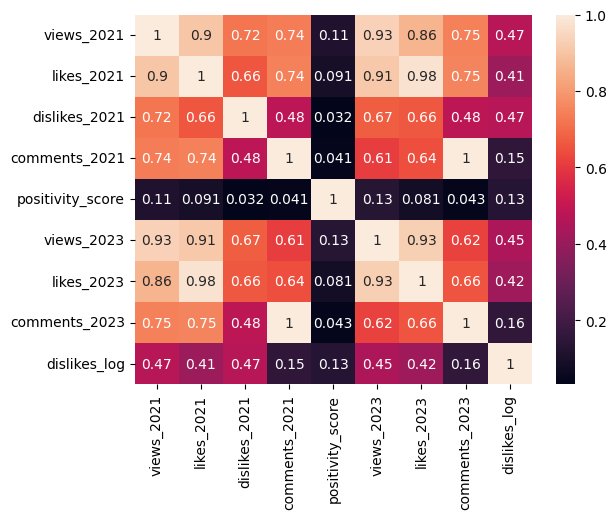

In [101]:
sns.heatmap(all_df.select_dtypes(exclude="object").corr(), annot=True);

In [77]:
scaler = MinMaxScaler()

In [98]:
scaled_df = scaler.fit_transform(all_df.select_dtypes(exclude="object"))
scaled_df = pd.DataFrame(scaled_df)
scaled_df

,0,1,2,3,4,5,6,7,8
0,0.002464,0.001182,0.000699,0.000233,0.552657,0.002690,0.001373,0.000262,0.295227
1,0.001657,0.001999,0.001158,0.000185,0.460088,0.005416,0.003617,0.000328,0.342580
2,0.000581,0.001005,0.000257,0.000124,0.544312,0.000505,0.000949,0.000124,0.205298
3,0.001219,0.000551,0.001213,0.000343,0.702534,0.000991,0.000505,0.000329,0.347003
4,0.001372,0.000565,0.000998,0.000401,0.355140,0.001155,0.000532,0.000403,0.328583
...,...,...,...,...,...,...,...,...,...
2394,0.017482,0.008773,0.015759,0.001164,0.634598,0.021725,0.011461,0.001283,0.594848
2395,0.008708,0.004425,0.005694,0.001289,0.661973,0.012288,0.005358,0.001521,0.495812
2396,0.000753,0.000728,0.000842,0.000191,0.470513,0.000650,0.000680,0.000189,0.312601
2397,0.000797,0.001337,0.000728,0.000118,0.488372,0.000663,0.001231,0.000114,0.299041


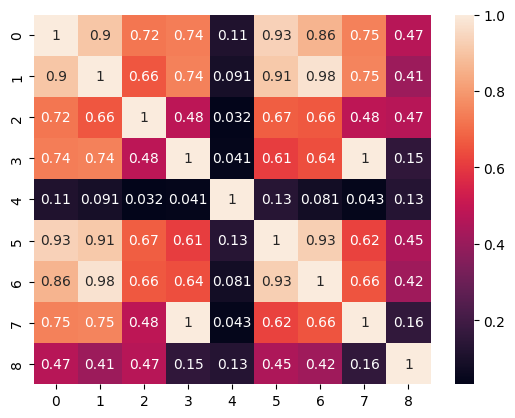

In [99]:
sns.heatmap(scaled_df.corr(), annot=True);

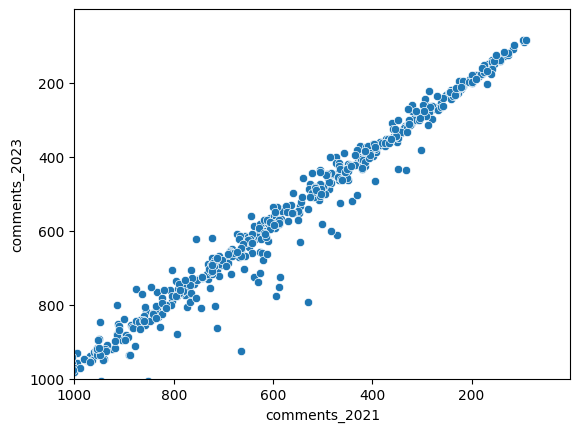

In [90]:
plt.xlim(1000)
plt.ylim(1000)
sns.scatterplot(x=all_df["comments_2021"], y=all_df["comments_2023"]);

In [96]:
import numpy as np
all_df["dislikes_log"] = np.log(all_df["dislikes_2021"])

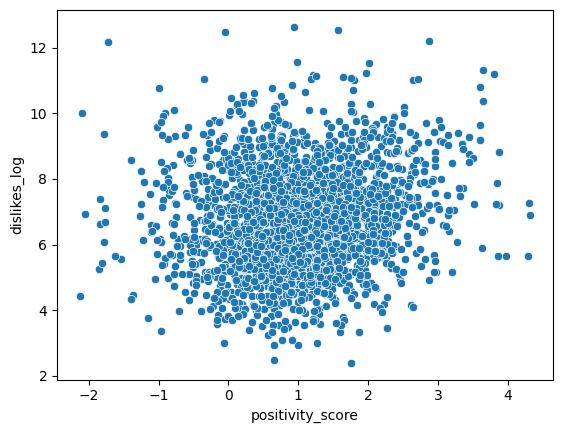

In [103]:
sns.scatterplot(x=all_df["positivity_score"], y=all_df["dislikes_log"]);

In [95]:
all_df.sort_values("dislikes_2021", ascending=False)

,video_id,views_2021,likes_2021,dislikes_2021,comments_2021,positivity_score,views_2023,likes_2023,comments_2023,upload_date,channel_id,title,description,channel_name,tags,genre
1708,53vz5pQH0Rg,23359293,398705,307512,57815,0.944552,25286797.0,415367.0,55775.0,2020-09-10T17:00:10Z,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul - 23 (Official Music Video) Starring...,"WATCH ""PARK SOUTH FREESTYLE"" MUSIC VIDEO 👉🏼 ht...",Jake Paul,"['mini jake paul', 'jake paul scary vids', 'lu...",Music
30,-5q5mZbe3V8,412591136,16354127,281252,5284107,1.572566,511180297.0,17904088.0,5172402.0,2020-11-20T04:58:11Z,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Life Goes On' Official MV,BTS (방탄소년단) 'Life Goes On' Official MV\n\n\nCr...,HYBE LABELS,"['BIGHIT', '빅히트', '방탄소년단', 'BTS', 'BANGTAN', '...",Music
1236,3QlT2JYi5iA,76759795,1130642,259830,19890,-0.041545,78617521.0,1147304.0,19018.0,2021-05-28T04:55:00Z,UCymK_3BWUcoYVVf5D_GmACQ,How many girls do you see?😳 #shorts,Thank you for watching.\nSubscribe to Tsuriki ...,Tsuriki Show,[''],Comedy
147,-ZRoI1GMc5w,91222245,4133436,197008,13027,2.873153,167245316.0,6650055.0,17746.0,2021-06-09T07:32:15Z,UC9PfekKMDzLt_tkragAeACw,SIGNS THAT HE LIKES YOU 🥰 #shorts @AlanChikinChow,It's the small things ❤️\n\n#ShortsWithShu #yo...,The One Shu,"['Asian actress', 'Shuang hu', 'skitswithshu',...",People & Blogs
313,0F9sX_CHi3g,124171970,5744386,193284,31401,-1.727000,234771362.0,10248890.0,42796.0,2021-07-17T16:48:23Z,UChfTcl5XfdTUCjkfuro982Q,Impossible iPhone Trick Shot,The most satisfying iPhone trick shot. #shorts,That's Amazing Shorts,[''],Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,4IsAl5DRxK0,56012,2900,20,182,1.273274,58084.0,2918.0,176.0,2021-01-26T17:27:49Z,UCeJ73ymlLhLctITwdi9iCVw,HASHTAG UNITED DOCUMENTARY TRAILER - BREAKING ...,Hashtag's documentary is on its way...who is b...,Hashtag United,"['hashtag united', 'hashtag fc', 'Spencer fc',...",Sports
308,0DFT6G3cLXk,213701,1623,19,94,0.647414,218347.0,1627.0,89.0,2021-04-10T18:23:43Z,UCSZxaHGo1OEs06vQumIooug,Corey Conners Makes Hole-In-One At The Masters,Ace! Corey Conners plays No. 6 to perfection. ...,The Masters,"['Masters', 'Tournament', 'Golf', 'Augusta', '...",Sports
578,1CM6_ddY-9Q,84593,1152,19,160,0.991818,84822.0,1147.0,152.0,2021-08-14T19:12:14Z,UC-TbqyJWlhRPedk-if0rKtw,"""THAT'S MO!"" | Jurgen Klopp Post-Match Press C...",Jurgen Klopp's post-match press conference fro...,Blood Red: Liverpool FC,"['liverpool fc', 'lfc', 'anfield', 'liverpool ...",Sports
1323,3ky9D2sq0DA,41729,312,12,225,0.656490,42003.0,310.0,194.0,2021-08-24T17:02:35Z,UC5DOK_H_fkhHBw_7pl0TViQ,Rolling Stones drummer Charlie Watts dies at a...,Watts' death comes just weeks after announcing...,WAVY TV 10,"['Local News', 'Video', 'Mobile']",News & Politics


In [57]:
all_df.to_csv("all_video_data.csv")

In [58]:
all_df.sort_values("positivity_score", ascending=False)

,video_id,views_2021,likes_2021,dislikes_2021,comments_2021,positivity_score,views_2023,likes_2023,comments_2023,upload_date,channel_id,title,description,channel_name,tags,genre
745,1lqfF6wOkMc,2805888,61611,990,5021,4.325586,12186362.0,183123.0,9135.0,2021-11-22T20:30:00Z,UCHWbZM3BIGgZksvXegx_h3w,Inside the Craziest Mansion We Have Ever Toure...,"This week we are in the South of France, touri...",Enes Yilmazer,"['Tour', 'Best Homes in the world', 'Best Home...",Entertainment
1049,2pTssBcIsz8,1348530,73634,1413,10267,4.303982,1934508.0,90217.0,11321.0,2021-10-18T18:52:41Z,UCJquYOG5EL82sKTfH9aMA9Q,I Can't Believe ADELE Did This Again!,In this episode we take a look at and analyze ...,Rick Beato,"['rick beato', 'everything music', 'music', 'm...",Music
743,1lov1ajyNYI,706021,39756,281,8735,4.283193,1232784.0,57214.0,10594.0,2021-02-06T19:16:33Z,UCZpOAIs1gWV76SEuzfGgG8w,WE RECEIVED THE FIRST GIFT FROM THE USA,Today we received the first package from a fri...,The Sheekoz Family,[''],People & Blogs
1184,3G83axfQ4DM,545410,8218,285,1887,3.974124,557295.0,8333.0,1703.0,2021-10-17T17:05:07Z,UCCvgLV2Ixb8KCemj-UtXZ-g,Prince William and Kate Arrive at Earthshot Prize,The Duke and Duchess of Cambridge have arrived...,The Royal Family Channel,"['Royal Family', 'British royals', 'British Ro...",News & Politics
680,1_4ELAxKrDc,14299386,274209,6818,6708,3.872034,140956767.0,1052977.0,16428.0,2021-11-04T16:00:09Z,UCPk3RMMXAfLhMJPFpQhye9g,Tiësto & Ava Max - The Motto (Official Music V...,Tiësto & Ava Max - The Motto \nStream/DL: http...,Tiësto,"['Tiesto', 'Tiësto', 'dance', 'electronic', 't...",Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,09JlQLSOWbI,5606504,285977,1636,25296,-1.830973,9497959.0,382103.0,28312.0,2020-08-24T19:00:01Z,UC7zsxKqd5MicTf4VhS9Y74g,This Low-Budget Animated Movie Ruined My Life,Go to https://expressvpn.com/kurtistown and fi...,Kurtis Conner,"['kurtis conner', 'kurtis connor', 'move revie...",Comedy
2253,7SMkLVoF8Oc,294930,2203,193,2055,-1.853600,295154.0,2200.0,1957.0,2021-09-20T13:56:58Z,UC8p1vwvWtl6T73JiExfWs1g,Search continues for Gabby Petito's fiancé as ...,"After the FBI announced a body ""consistent wit...",CBS News,"['video', 'cbs', 'cbsn am', 'FBI', 'announceme...",News & Politics
2068,6MbOI5foIA4,2001041,23616,1032,5923,-2.045278,5168577.0,54576.0,9835.0,2021-05-19T15:44:59Z,UCjHWv2DU5-HLpogAAr386DQ,Video of water gun fight that turned deadly,"It started out as a friendly water gun fight, ...",FOX 5 Atlanta,['water gun fight death'],News & Politics
2195,6kKfZQ8u4T8,21396430,776320,22182,11213,-2.099098,30640582.0,1381931.0,13640.0,2021-01-17T01:16:53Z,UC_pT_Iz6XjuM-eMTlXghdfw,Eating a 300 DAY Old Steak RAW #shorts,Eating a 300 DAY Old Steak RAW #shorts\n\nFoun...,Max the Meat Guy,"['how to dry age meat', 'dry aging a ribeye', ...",People & Blogs


In [59]:
all_df.value_counts("channel_id")

channel_id
UCNAf1k0yIjyGu3k9BwAg3lg    50
UCMmVPVb0BwSIOWVeDwlPocQ    38
UCpB959t8iPrxQWj7G6n0ctQ    18
UCke6I9N4KfC968-yRcd5YRg    15
UCqZQlzSHbVJrwrn5XvzrzcA    13
                            ..
UCXadYw41ybbis_JnSseBt2g     1
UCXbboag48Qlr78zzz6SkzkQ     1
UCXcMEuLWTxA2D8IZcfouBiA     1
UCXenWaHGZz4Ey4BObUUIyZQ     1
UCzznO4xSV8BKnUBPyswtCUw     1
Name: count, Length: 1338, dtype: int64